In [2]:
import json
import pandas as pd
import matplotlib.pyplot as plt

# Assumindo que você tem um arquivo JSON chamado 'data.json'
# Se tiver múltiplos arquivos, você pode adaptá-los em uma lista

# 1. Carregar o JSON e transformar em DataFrame
with open('Decision Tree - busca_hiperparametros_.json', 'r') as file:
    data = json.load(file)

# Extrair os scores do dicionário
df = pd.DataFrame({
    'mean_train_score': data['Decision Tree']['mean_train_score'],
    'mean_test_score': data['Decision Tree']['mean_test_score'],
    'std_train_score': data['Decision Tree']['std_train_score'],
    'std_test_score': data['Decision Tree']['std_test_score']
})


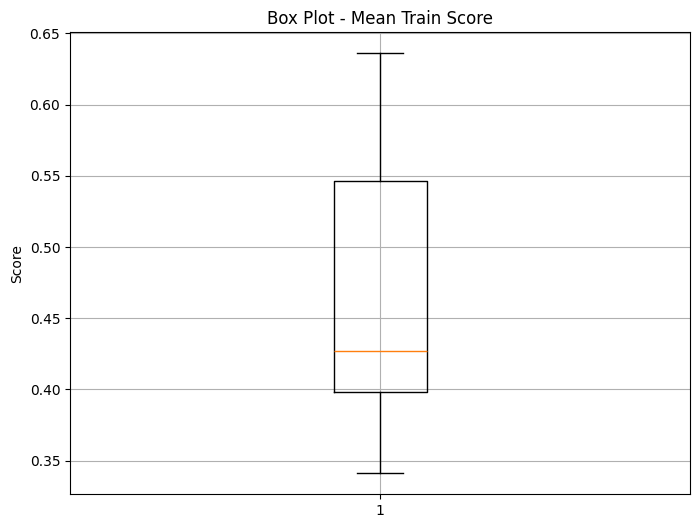

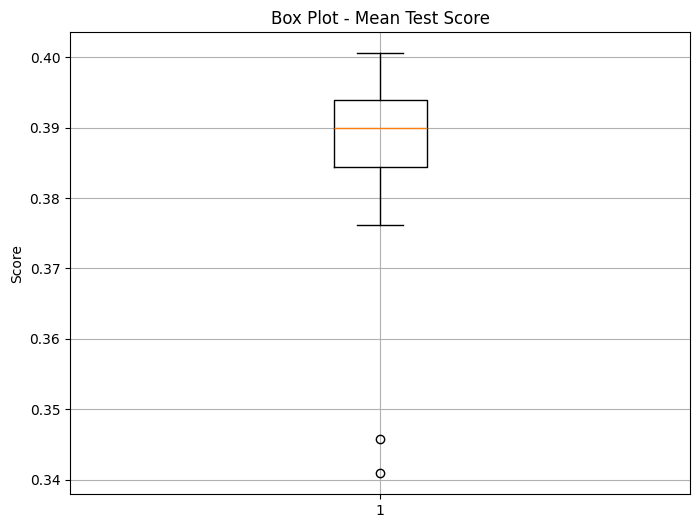

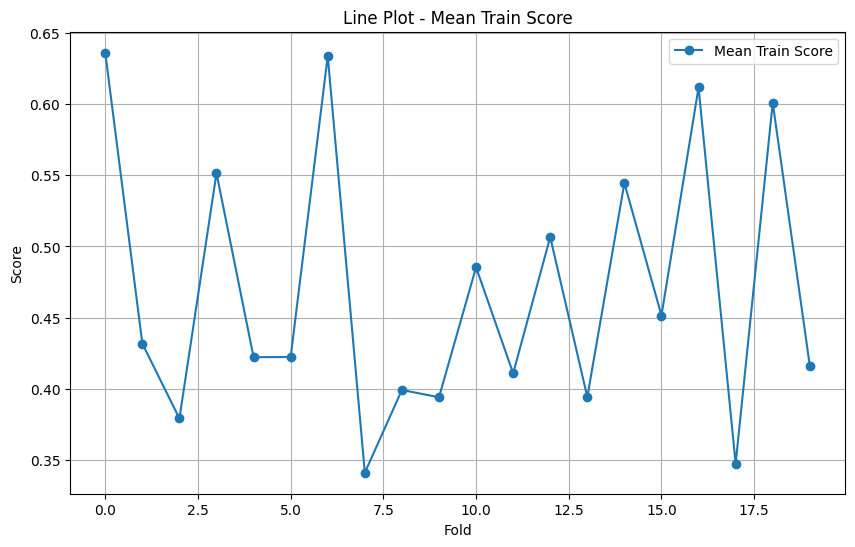

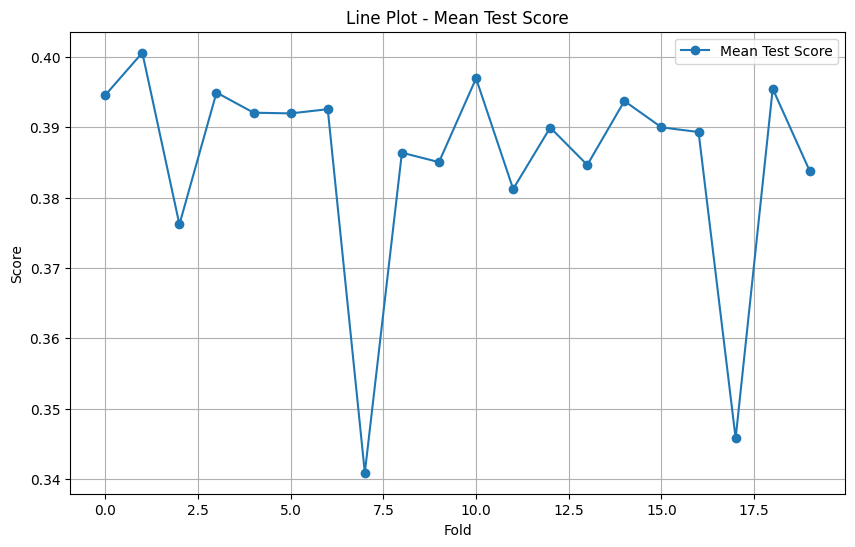

"\n# Exemplo para múltiplos arquivos\nfiles = ['data1.json', 'data2.json', 'data3.json']  # Lista de arquivos\nall_data = []\n\nfor file in files:\n    with open(file, 'r') as f:\n        data = json.load(f)\n        df_temp = pd.DataFrame({\n            'mean_train_score': data['Decision Tree']['mean_train_score'],\n            'mean_test_score': data['Decision Tree']['mean_test_score']\n        })\n        all_data.append(df_temp)\n\n# Combinar todos em um único DataFrame\ndf_combined = pd.concat(all_data, axis=1, keys=[f'Model_{i+1}' for i in range(len(files))])\n\n# Box plots para múltiplos modelos\nplt.figure(figsize=(12, 6))\nplt.boxplot([df_combined[f'Model_{i+1}']['mean_train_score'] for i in range(len(files))])\nplt.title('Box Plot - Mean Train Score (Multiple Models)')\nplt.xticks(range(1, len(files) + 1), [f'Model {i+1}' for i in range(len(files))])\nplt.ylabel('Score')\nplt.grid(True)\nplt.show()\n\nplt.figure(figsize=(12, 6))\nplt.boxplot([df_combined[f'Model_{i+1}']['mean

In [ ]:

# 2. Criar box plots
# Box plot para mean_train_score
plt.figure(figsize=(8, 6))
plt.boxplot(df['mean_train_score'])
plt.title('Box Plot - Mean Train Score')
plt.ylabel('Score')
plt.grid(True)
plt.show()

# Box plot para mean_test_score
plt.figure(figsize=(8, 6))
plt.boxplot(df['mean_test_score'])
plt.title('Box Plot - Mean Test Score')
plt.ylabel('Score')
plt.grid(True)
plt.show()

# 3. Criar gráficos de linha
# Gráfico de linha para mean_train_score
plt.figure(figsize=(10, 6))
plt.plot(df['mean_train_score'], label='Mean Train Score', marker='o')
plt.title('Line Plot - Mean Train Score')
plt.xlabel('Fold')
plt.ylabel('Score')
plt.grid(True)
plt.legend()
plt.show()

# Gráfico de linha para mean_test_score
plt.figure(figsize=(10, 6))
plt.plot(df['mean_test_score'], label='Mean Test Score', marker='o')
plt.title('Line Plot - Mean Test Score')
plt.xlabel('Fold')
plt.ylabel('Score')
plt.grid(True)
plt.legend()
plt.show()


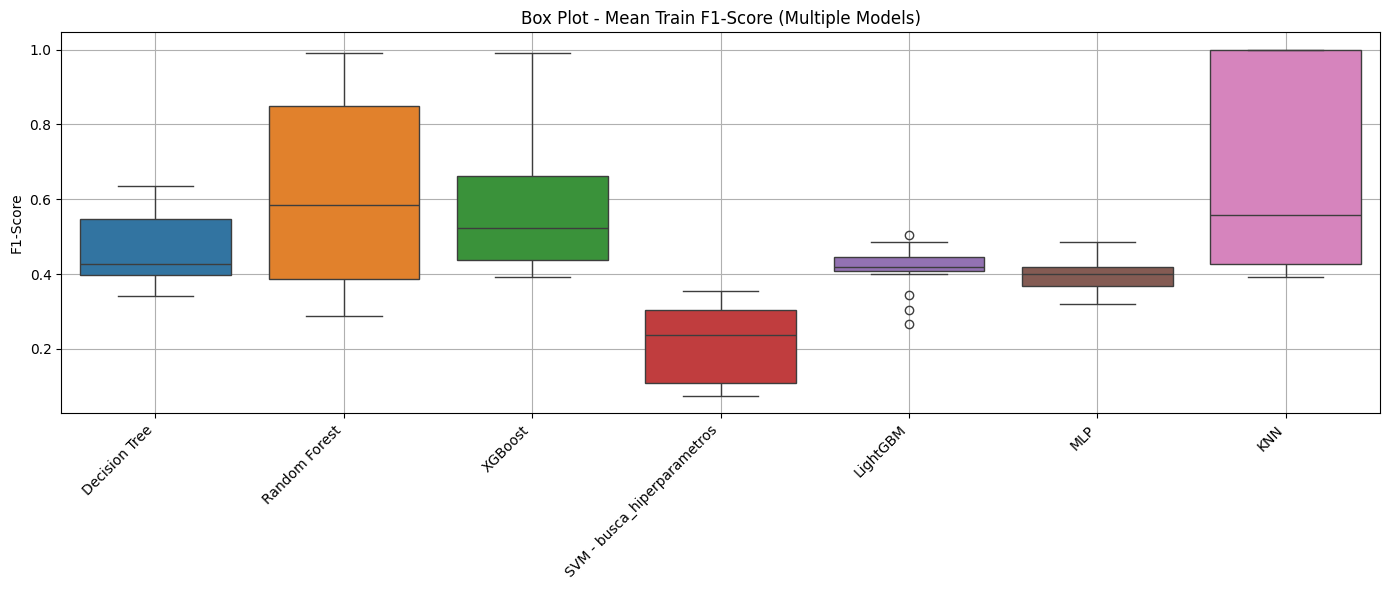

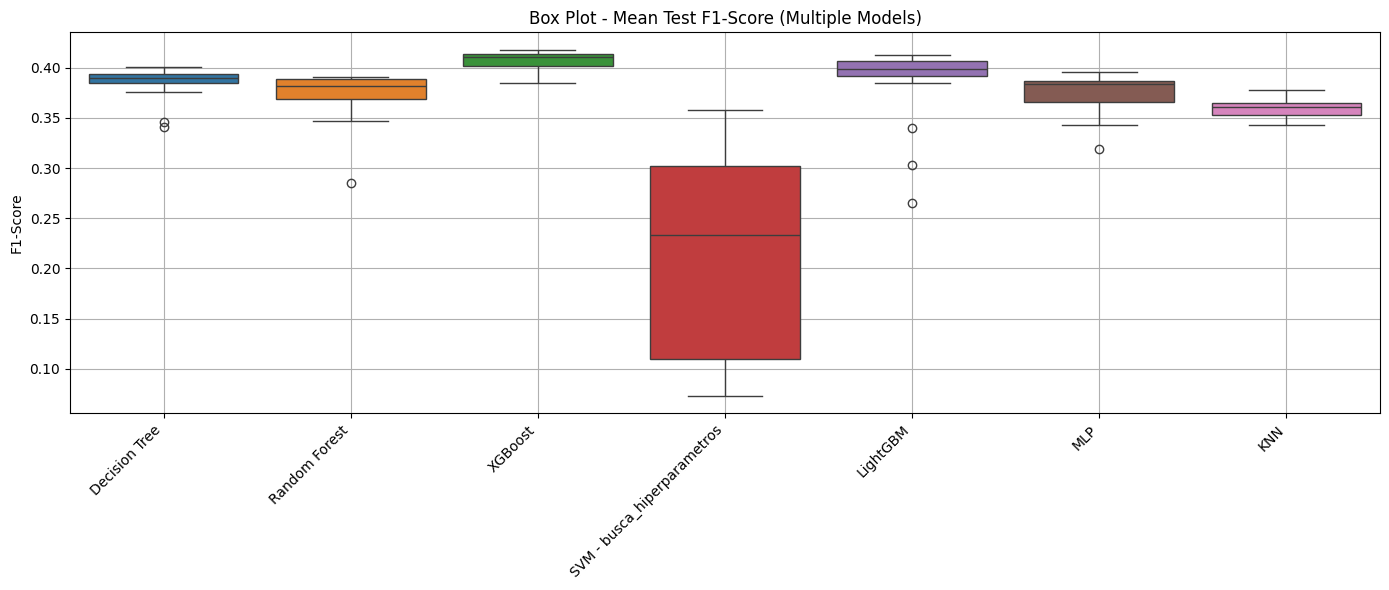

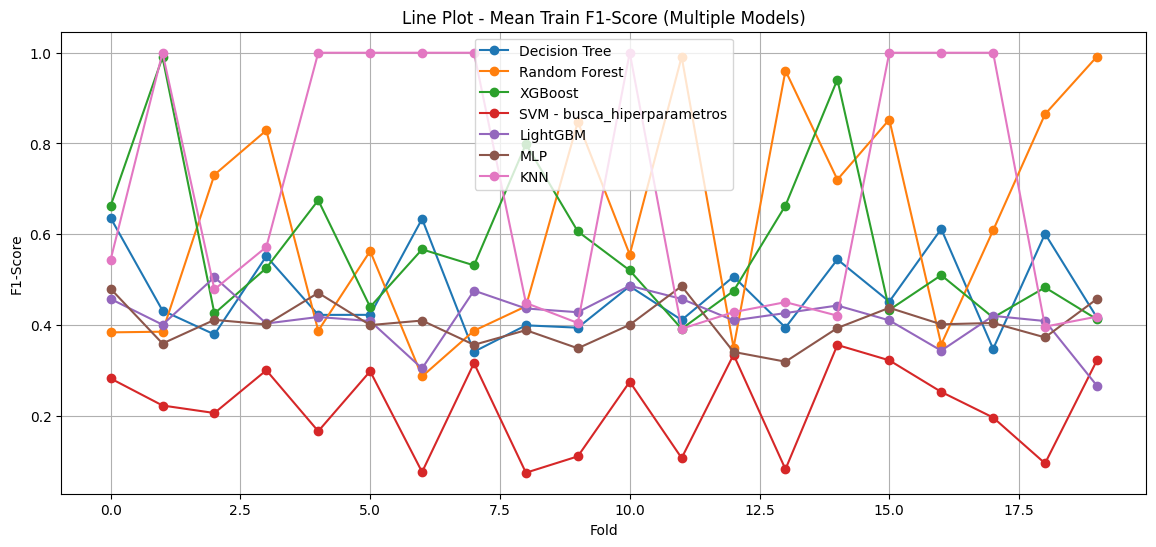

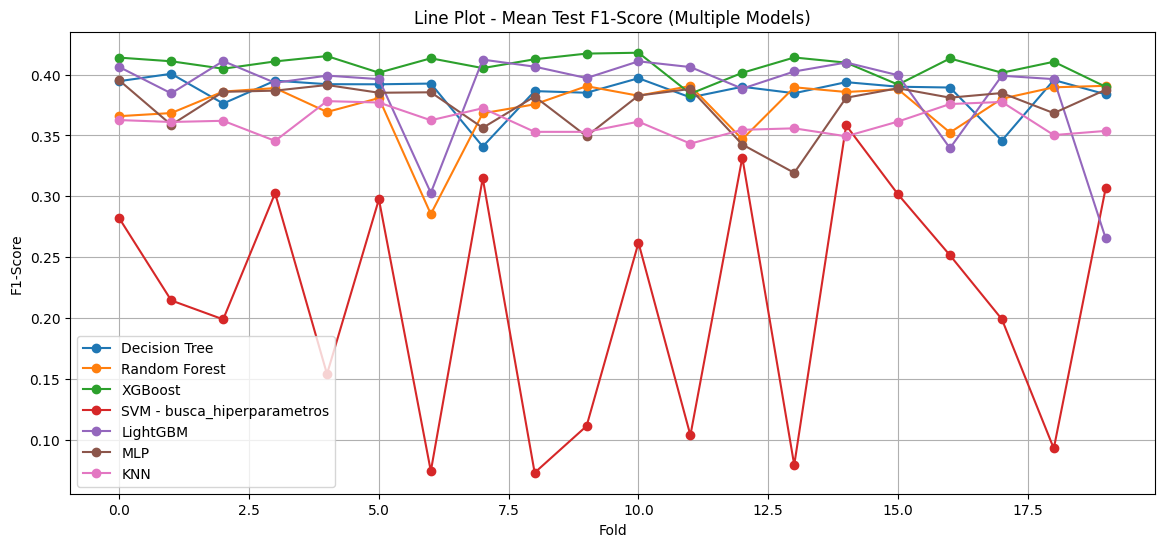

In [9]:
import seaborn as sns

# Lista de arquivos
files = [
    'Decision Tree - busca_hiperparametros_.json',
    'Random Forest - busca_hiperparametros_.json',
    'XGBoost - busca_hiperparametros_.json',
    'SVM - busca_hiperparametros.json',
    'LightGBM - busca_hiperparametros_.json',
    'MLP - busca_hiperparametros_.json',
    'KNN - busca_hiperparametros_.json'
]

all_data = []
model_names = []

# Carregar os dados de cada arquivo
for file in files:
    with open(file, 'r') as f:
        data = json.load(f)
        # Extrair o nome do modelo do nome do arquivo (removendo " - busca_hiperparametros_" e ".json")
        model_name = file.replace(' - busca_hiperparametros_', '').replace('.json', '')
        model_names.append(model_name)
        
        # Pegar a chave raiz do JSON (assumindo que é o nome do modelo ou uma chave única)
        root_key = list(data.keys())[0]  # Pega a primeira chave do dicionário (ex.: "Decision Tree", "Random Forest", etc.)
        
        # Criar DataFrame temporário com os scores
        df_temp = pd.DataFrame({
            'mean_train_score': data[root_key]['mean_train_score'],
            'mean_test_score': data[root_key]['mean_test_score']
        })
        all_data.append(df_temp)

# Combinar todos em um único DataFrame
df_combined = pd.concat(all_data, axis=1, keys=model_names)

# Box plot para mean_train_score
plt.figure(figsize=(14, 6))
sns.boxplot(data=df_combined.xs('mean_train_score', level=1, axis=1))
plt.title('Box Plot - Mean Train F1-Score (Multiple Models)')
plt.xticks(rotation=45, ha='right')
plt.ylabel('F1-Score')
plt.grid(True)
plt.tight_layout()  # Ajusta o layout para evitar sobreposição
plt.show()

# Box plot para mean_test_score
plt.figure(figsize=(14, 6))
sns.boxplot(data=df_combined.xs('mean_test_score', level=1, axis=1))
plt.title('Box Plot - Mean Test F1-Score (Multiple Models)')
plt.xticks(rotation=45, ha='right')
plt.ylabel('F1-Score')
plt.grid(True)
plt.tight_layout()
plt.show()

# Gráficos de linha para mean_train_score
plt.figure(figsize=(14, 6))
for model in model_names:
    plt.plot(df_combined[model]['mean_train_score'], label=model, marker='o')
plt.title('Line Plot - Mean Train F1-Score (Multiple Models)')
plt.xlabel('Fold')
plt.ylabel('F1-Score')
plt.legend()
plt.grid(True)
plt.show()

# Gráficos de linha para mean_test_score
plt.figure(figsize=(14, 6))
for model in model_names:
    plt.plot(df_combined[model]['mean_test_score'], label=model, marker='o')
plt.title('Line Plot - Mean Test F1-Score (Multiple Models)')
plt.xlabel('Fold')
plt.ylabel('F1-Score')
plt.legend()
plt.grid(True)
plt.show()